In [4]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.stats import f_oneway
import seaborn as sns

In [5]:
# Load the data from the external CSV file into a Pandas DataFrame
file_path = '../result-pubsub.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(file_path)

labels = ['pub_py', 'pub_cpp', 'sub_py', 'sub_cpp']

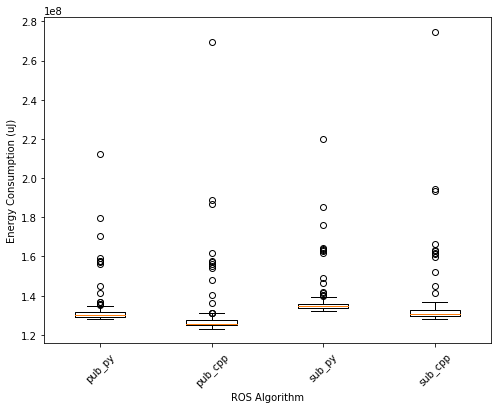

In [6]:
# CPU Energy Consumption (uJ)

plt.figure(figsize=(8, 6))
plt.xlabel('ROS Algorithm')
plt.ylabel('Energy Consumption (uJ)')
plt.xticks(rotation=45)


data_to_plot = [df[df['label'] == label]['pkg'] for label in labels]

#plt.ylim(1.2*1e8, 1.8*1e8)

plt.boxplot(data_to_plot, labels=labels)

plt.savefig('figs/whisker_pubsub_cpu.pdf')

plt.show()

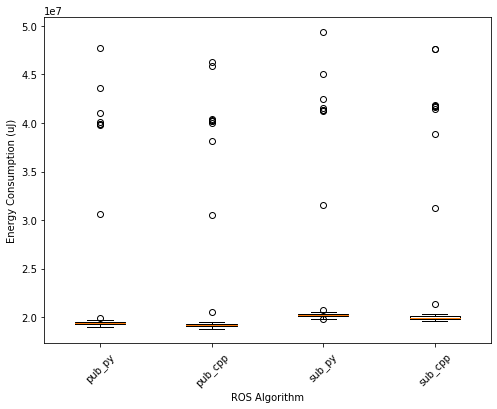

In [7]:
# DRAM Energy Comsumption (uJ)

plt.figure(figsize=(8, 6))
plt.xlabel('ROS Algorithm')
plt.ylabel('Energy Consumption (uJ)')
plt.xticks(rotation=45)

#labels = ['pub_py4', 'pub_cpp4', 'sub_py4', 'sub_cpp4']
data_to_plot = [df[df['label'] == label]['dram'] for label in labels]

#plt.ylim(1.5*1e7, 4*1e7)

plt.boxplot(data_to_plot, labels=labels)

plt.savefig('figs/whisker_pubsub_dram.pdf')

plt.show()

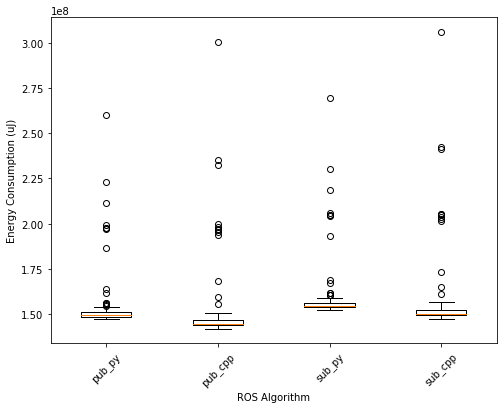

In [8]:
# Cumulative Energy Comsumption (uJ)

plt.figure(figsize=(8, 6))
plt.xlabel('ROS Algorithm')
plt.ylabel('Energy Consumption (uJ)')
plt.xticks(rotation=45)

df['cpu_dram'] = df['pkg'] + df['dram']
data_to_plot = [df[df['label'] == label]['cpu_dram'] for label in labels]

#plt.ylim(1.4*1e8, 2*1e8)

plt.boxplot(data_to_plot, labels=labels)

plt.savefig('figs/whisker_pubsub_ec_total.pdf')

plt.show()

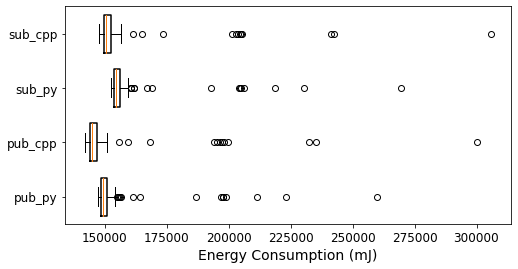

In [9]:
# Cumulative Energy Comsumption (mJ)
plt.figure(figsize=(8, 4))

df['cpu_dram_mj'] = df['cpu_dram'] / 1000
data_to_plot = [df[df['label'] == label]['cpu_dram_mj'] for label in labels]

plt.boxplot(data_to_plot, vert=False, widths=0.7, patch_artist=False, boxprops=dict(linewidth=1.5))

plt.xlabel('Energy Consumption (mJ)',  fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(range(1, len(labels) + 1), labels, fontsize=12)

# plt.xticks(fontsize=16)
# plt.yticks(fontsize=16)

# df['cpu_dram_mj'] = df['cpu_dram'] / 1000
# data_to_plot = [df[df['label'] == label]['cpu_dram_mj'] for label in labels]

# plt.ylim(1.4*1e5, 2*1e5)

# plt.boxplot(data_to_plot, widths=0.8, labels=labels, boxprops=dict(linewidth=1))

plt.savefig('figs/whisker_pubsub_ec_mj_total.pdf')

# def format_y_tick(value, _):
#     if value >= 1000:
#         return f'{int(value / 1000)}k'
#     elif value >= 1000000:
#         return f'{int(value / 1000000)}m'
#     else:
#         return f'{int(value)}'
    
# plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_y_tick))

plt.show()

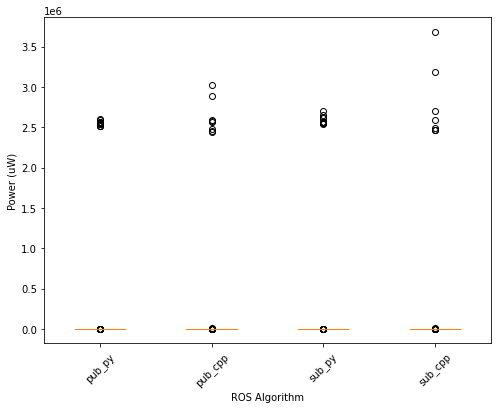

In [10]:
# Cumulative Power

plt.figure(figsize=(8, 6))
plt.xlabel('ROS Algorithm')
plt.ylabel('Power (uW)')
plt.xticks(rotation=45)

# Calculate power (in uW) by dividing energy consumption (pkg, uJ) by time (duration, us)
df['power_uw'] = (df['pkg'] * 1e6) / df['duration']  # Power in micro-watts (uW)

data_to_plot = [df[df['label'] == label]['power_uw'] for label in labels]

#plt.ylim(0.00225*1e6, 0.004*1e6)

plt.boxplot(data_to_plot, labels=labels)

plt.savefig('figs/whisker_pubsub_power_uw_total.pdf')

plt.show()

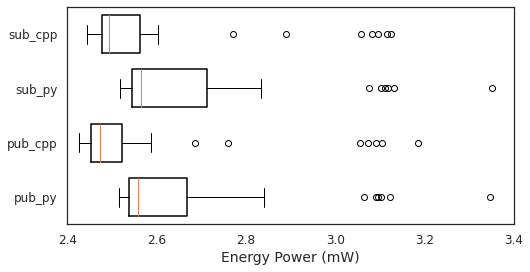

In [22]:
# Cumulative Power (mW)

plt.figure(figsize=(8, 4))
# #plt.xlabel('ROS Algorithm',  fontsize=20)
# plt.ylabel('Power (mW)',  fontsize=18)
# plt.xticks(fontsize=16)
# plt.yticks(fontsize=16)

# # Calculate power (in uW) by dividing energy consumption (pkg, uJ) by time (duration, us)
df['power_uw'] = (df['pkg'] * 1e6) / df['duration']  # Power in micro-watts (uW)
df['power_mw'] = df['power_uw'] / 1000

data_to_plot = [df[df['label'] == label]['power_mw'] for label in labels]

plt.xlim(2.4, 3.4)

# plt.boxplot(data_to_plot, widths=0.8, labels=labels, boxprops=dict(linewidth=1))

plt.boxplot(data_to_plot, vert=False, widths=0.7, patch_artist=False, boxprops=dict(linewidth=1.5))

plt.xlabel('Energy Power (mW)',  fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(range(1, len(labels) + 1), labels, fontsize=12)

plt.savefig('figs/whisker_pubsub_power_mw_total.pdf')

plt.show()

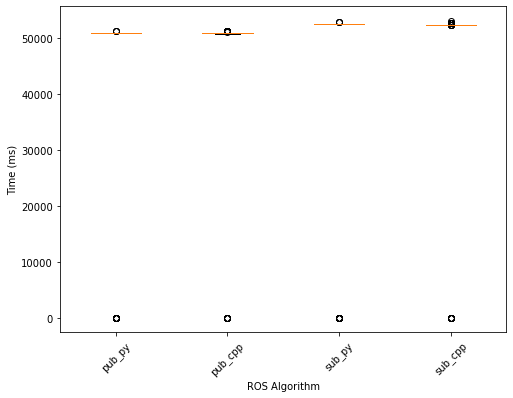

In [12]:
# Execution Time

plt.figure(figsize=(8, 6))
plt.xlabel('ROS Algorithm')
plt.ylabel('Time (ms)')
plt.xticks(rotation=45)

# Calculate power (in uW) by dividing energy consumption (pkg, uJ) by time (duration, us)
df['time'] = df['duration'] / 1000000 # Power in micro-watts (uW)

data_to_plot = [df[df['label'] == label]['time'] for label in labels]

#plt.ylim(5.05*1e7, 5.275*1e7)
#plt.ylim(50.5*1e3, 53.25*1e3)

plt.boxplot(data_to_plot, labels=labels)

plt.savefig('figs/whisker_pubsub_exec_time.pdf')

plt.show()

In [23]:
# Statistics

mean_power_by_label = df.groupby('label')['cpu_dram_mj'].mean()
print(mean_power_by_label)

max_power_by_label = df.groupby('label')['cpu_dram_mj'].max()
print(max_power_by_label)

min_power_by_label = df.groupby('label')['cpu_dram_mj'].min()
print(min_power_by_label)

avg_power_by_label = df.groupby('label')['cpu_dram_mj'].median()
print(avg_power_by_label)

std_power_by_label = df.groupby('label')['cpu_dram_mj'].std()
print(std_power_by_label)

label
pub_cpp     152036.610270
pub_cpp1    186271.914429
pub_py      154700.736800
sub_cpp     157768.211220
sub_cpp1    194933.879286
sub_py      160132.067420
Name: cpu_dram_mj, dtype: float64
label
pub_cpp     300145.229
pub_cpp1    248945.347
pub_py      259981.573
sub_cpp     305823.802
sub_cpp1    263726.131
sub_py      269366.010
Name: cpu_dram_mj, dtype: float64
label
pub_cpp     142070.009
pub_cpp1     53296.006
pub_py      147229.726
sub_cpp     147511.036
sub_cpp1     53276.780
sub_py      152339.149
Name: cpu_dram_mj, dtype: float64
label
pub_cpp     144858.2715
pub_cpp1    222679.1180
pub_py      149336.3795
sub_cpp     150425.7930
sub_cpp1    231332.1110
sub_py      154644.1970
Name: cpu_dram_mj, dtype: float64
label
pub_cpp     22986.417228
pub_cpp1    79395.707642
pub_py      17470.308201
sub_cpp     23333.906460
sub_cpp1    85525.221608
sub_py      18058.659799
Name: cpu_dram_mj, dtype: float64


In [24]:
df.mode()

,label,timestamp,duration,pkg,dram,socket,cpu_dram,cpu_dram_mj,power_uw,power_mw,time
0,pub_cpp,1.696541e+09,1.158349e+07,133640039.0,9734045.0,0.0,53276780.0,53276.780,2.425112e+03,2.425112,11.583492
1,pub_py,1.696543e+09,1.158490e+07,NaN,9736242.0,NaN,53296006.0,53296.006,2.429273e+03,2.429273,11.584898
2,sub_cpp,1.696544e+09,1.939101e+07,NaN,16359822.0,NaN,91725046.0,91725.046,2.431344e+03,2.431344,19.391012
3,sub_py,1.696545e+09,1.939462e+07,NaN,16366413.0,NaN,91804575.0,91804.575,2.433274e+03,2.433274,19.394616
4,NaN,1.696546e+09,5.073007e+07,NaN,18816786.0,NaN,142070009.0,142070.009,2.433502e+03,2.433502,50.730066
...,...,...,...,...,...,...,...,...,...,...,...
409,NaN,NaN,5.267442e+10,NaN,46252506.0,NaN,261269046.0,261269.046,3.889645e+06,3889.644593,52674.421673
410,NaN,NaN,5.282828e+10,NaN,47619568.0,NaN,263726131.0,263726.131,4.012372e+06,4012.371614,52828.283299
411,NaN,NaN,5.287734e+10,NaN,47636414.0,NaN,269366010.0,269366.010,4.052784e+06,4052.784190,52877.338713
412,NaN,NaN,5.289423e+10,NaN,47707092.0,NaN,300145229.0,300145.229,4.152840e+06,4152.839552,52894.229739


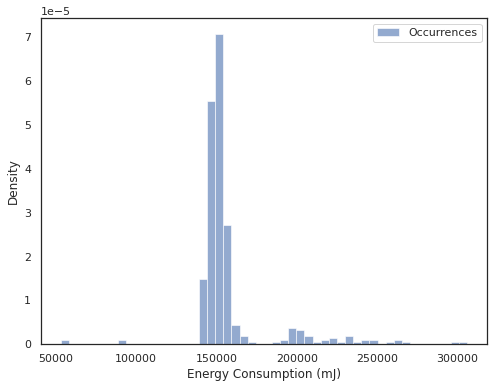

In [25]:
# Skewed Distribution Graph
data = df['cpu_dram_mj']

# Create a histogram to visualize the skewed distribution
plt.figure(figsize=(8, 6))
plt.hist(data, bins=50, density=True, alpha=0.6, color='b', label='Occurrences')

# Add labels and title
plt.xlabel('Energy Consumption (mJ)')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [27]:
pub_py_data = df[df['label'] == 'pub_py']['power_mw']
pub_cpp_data = df[df['label'] == 'pub_cpp']['power_mw']
sub_py_data = df[df['label'] == 'sub_py']['power_mw']
sub_cpp_data = df[df['label'] == 'sub_cpp']['power_mw']

In [28]:
# Perform one-way ANOVA
f_statistic, p_value = f_oneway(pub_py_data, pub_cpp_data)

In [29]:
# Perform one-way ANOVA
f_statistic, p_value = f_oneway(pub_py_data, pub_cpp_data)

# Set the significance level
alpha = 0.05

# Print the results
print(f'F-statistic: {f_statistic:.4f}')
print(f'P-value: {p_value:.4f}')

# Perform a hypothesis test
if p_value < alpha:
    print('Reject the null hypothesis: There is a significant difference between groups.')
else:
    print('Fail to reject the null hypothesis: There is no significant difference between groups.')

F-statistic: 0.7609
P-value: 0.3841
Fail to reject the null hypothesis: There is no significant difference between groups.


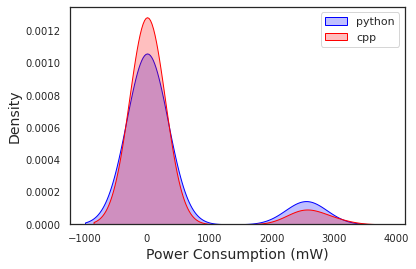

In [30]:
# Set the style for the plots (optional)
sns.set(style="white")

# Create a probability density plot (kernel density plot) for 'pub_py'
sns.kdeplot(pub_py_data, label='python', fill=True, color='blue')

# Create a probability density plot (kernel density plot) for 'pub_cpp'
sns.kdeplot(pub_cpp_data, label='cpp', fill=True, color='red')

# Add labels and a legend
plt.xlabel('Power Consumption (mW)',fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.legend()

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.savefig('figs/prob_density_pub_pw_mw.pdf')

# Show the plot
plt.show()

In [31]:
# Perform one-way ANOVA
f_statistic, p_value = f_oneway(sub_py_data, sub_cpp_data)


# Set the significance level
alpha = 0.05

# Print the results
print(f'F-statistic: {f_statistic:.4f}')
print(f'P-value: {p_value:.4f}')

# Perform a hypothesis test
if p_value < alpha:
    print('Reject the null hypothesis: There is a significant difference between groups.')
else:
    print('Fail to reject the null hypothesis: There is no significant difference between groups.')

F-statistic: 1.9320
P-value: 0.1661
Fail to reject the null hypothesis: There is no significant difference between groups.


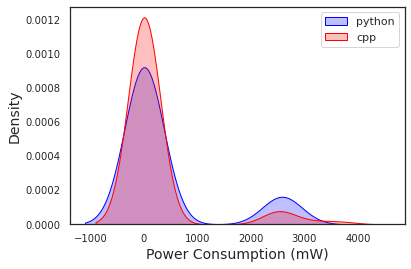

In [32]:
# Set the style for the plots (optional)
sns.set(style="white")

# Create a probability density plot (kernel density plot) for 'pub_py'
sns.kdeplot(sub_py_data, label='python', fill=True, color='blue')

# Create a probability density plot (kernel density plot) for 'pub_cpp'
sns.kdeplot(sub_cpp_data, label='cpp', fill=True, color='red')

# Add labels and a legend
plt.xlabel('Power Consumption (mW)',fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.legend()

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.savefig('figs/prob_density_pub_pw_mw_2.pdf')

# Show the plot
plt.show()